In [7]:
from espn_api.football import League, Matchup, Player, BoxPlayer, Team
from espn_api.football import box_score
from espn_api.football import helper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [ ]:
getattr(matchup, f"{str}_lineup")[0].stats[1].keys()

In [19]:
league_id = 1957747319
year = 2025
espn_s2 = "AEBb%2FDwONHQyMedrYsdD%2FErgg4sIQEhuTg7HnQfw7cAswgeY8hvRVZM3bBS7Kn3lqzpR7fANyNnx3gSb0cKpo078OukVEfEo4zHTtIAp4BPh7KkrKU0%2BxwT%2FWx0505bJz95b4C6OEA6o3AuzDrcEnhUS0X6dC%2B3fGbzoNgAjZxP5BiLSPgu5tYn%2BWhXwqw9ajsxxMIIIOFvAhSv%2BQOXnHpd8rG%2FmPKR3faPQlaoNs3aiLWdv%2B63EiYIzCeC%2FzeHcq8Fhhtbg27xT4%2FyLiMeGCAllTFia6KLg9X7R58tbGc7QbQ%3D%3D"
swid = "{FBA603CA-5829-4581-A603-CA5829E581F0}"

# create League object
league = League(
    league_id=league_id,
    year=year,
    espn_s2=espn_s2,
    swid=swid
)

In [81]:
league.standings()

[Team(That was the dagger),
 Team(Dee Wuffest),
 Team(Small PP team),
 Team(Team Rock),
 Team(Zilwaukee Chudwick),
 Team(Mat Noment Oens),
 Team(Tiitsburgh Feelers ),
 Team(Straw Hat),
 Team(Otay MyMan),
 Team(LeFantasy Football),
 Team(PBR Kayla),
 Team(Swordless Mimetown)]

In [175]:
week = 2
test_case = league.box_scores(week=2)

In [209]:
test_case[0]

Box Score(Team(Dee Wuffest) at Team(Tiitsburgh Feelers ))

In [215]:
test_case[1].home_lineup[0].stats[2]['projected_breakdown'].keys().__len__()

36

In [58]:
team_stats = pd.read_csv('/Users/benstager/Desktop/fantasy/data/team_stats_by_position.csv')
team_scoring = pd.read_csv('/Users/benstager/Desktop/fantasy/data/scoreboard.csv')
team_pivot_scoring = pd.read_csv('/Users/benstager/Desktop/fantasy/data/scoreboard_pivot.csv')
PR = pd.read_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv')

In [72]:
weeks = [1,2,3]

current_year_stats = team_stats[(team_stats['year'] == 2025) & (team_stats['week'].isin(weeks))]
current_year_stats['diff'] = current_year_stats['player_scored'] - current_year_stats['player_projected']
current_year_scoring = team_scoring[(team_scoring['year'] == 2025) & (team_scoring['week'].isin(weeks))]
current_year_pivot_scoring = team_pivot_scoring[(team_pivot_scoring['year'] == 2025) & (team_pivot_scoring['week'].isin(weeks))]
grouped = current_year_pivot_scoring.groupby('team').agg({'score':'mean', 'projected':'mean', 'allowed':'mean'})
grouped['diff'] = grouped['score'] - grouped['projected']

diffs = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'diff':'mean'}).reset_index()
diffs_grouped_min = diffs.groupby('team')['diff'].idxmin()
diffs_grouped_max = diffs.groupby('team')['diff'].idxmax()

In [122]:
diffs = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'diff':'mean'}).reset_index()
diffs_grouped_min = diffs.groupby('team')['diff'].idxmin()
diffs_grouped_max = diffs.groupby('team')['diff'].idxmax()

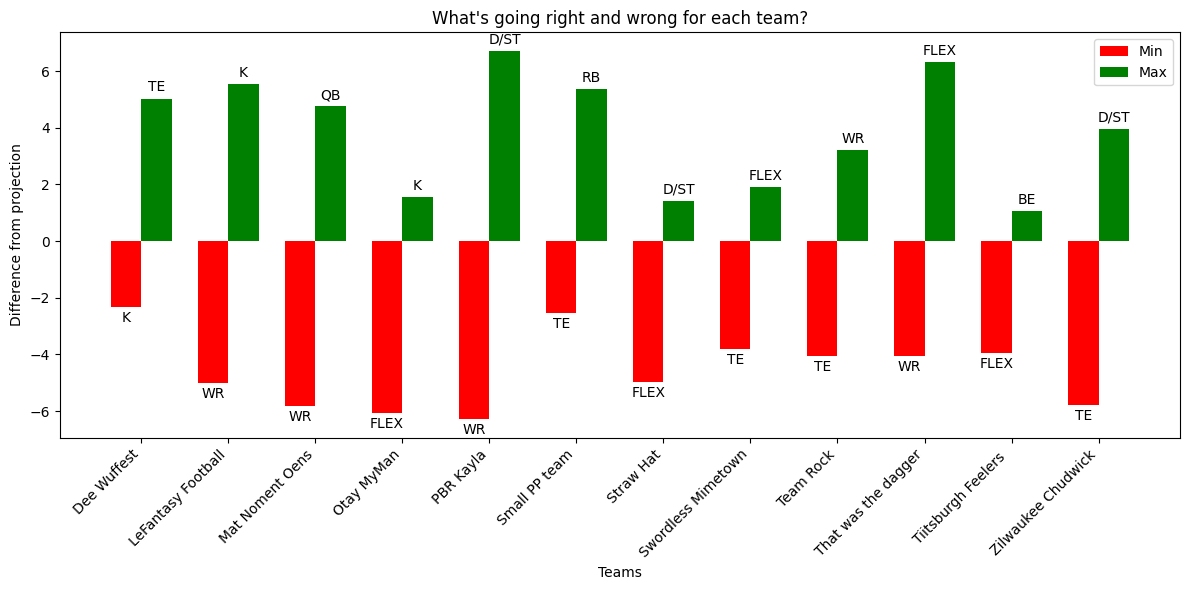

In [132]:
diffs.loc[diffs_grouped_min.values]
diffs.loc[diffs_grouped_max.values]
# Create a bar chart with two bars per team
teams = diffs['team'].unique()
min_values = diffs.loc[diffs_grouped_min.values]['diff'].values
max_values = diffs.loc[diffs_grouped_max.values]['diff'].values
min_positions = diffs.loc[diffs_grouped_min.values]['started_nonstarted'].values
max_positions = diffs.loc[diffs_grouped_max.values]['started_nonstarted'].values

x = np.arange(len(teams))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, min_values, width, label='Min', color='red')
bars2 = ax.bar(x + width/2, max_values, width, label='Max', color='green')

# Add labels, title, and legend
ax.set_xlabel('Teams')
ax.set_ylabel('Difference from projection')
ax.set_title("What's going right and wrong for each team?")
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Add labels to each bar
ax.bar_label(bars1, labels=min_positions, padding=3, fontsize=10)
ax.bar_label(bars2, labels=max_positions, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

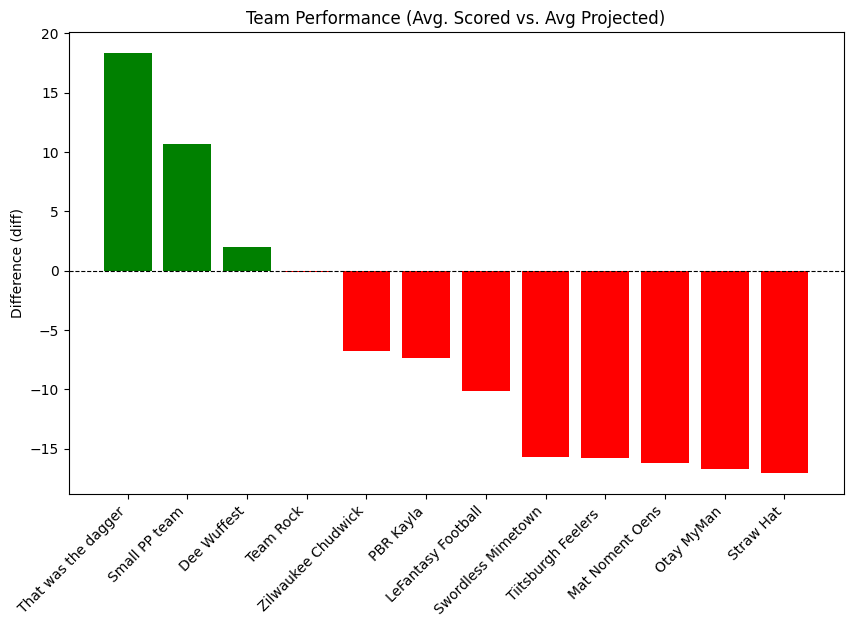

In [80]:
grouped_sorted = grouped.sort_values('diff', ascending=False)
plt.figure(figsize=(10, 6))
colors = ['green' if val > 0 else 'red' for val in grouped_sorted['diff']]
plt.bar(grouped_sorted.index, grouped_sorted['diff'], color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Difference (diff)')
plt.title('Team Performance (Avg. Scored vs. Avg Projected)')
plt.show()

In [94]:
display(current_year_scoring[current_year_scoring['week'] == 3])

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner
180,0,2025,3,Straw Hat,Cash,82.82,118.60,Tiitsburgh Feelers,Gavin,89.22,116.49,Team(Tiitsburgh Feelers )
181,0,2025,3,Dee Wuffest,Jake,116.16,120.21,LeFantasy Football,Ethan,113.42,123.61,Team(Dee Wuffest)
182,0,2025,3,Swordless Mimetown,Hayden,104.64,120.89,Mat Noment Oens,Harry,107.62,132.89,Team(Mat Noment Oens)
183,0,2025,3,Small PP team,Greenberg,165.34,128.00,PBR Kayla,Stager,152.10,122.30,Team(Small PP team)
184,0,2025,3,Otay MyMan,Cawley,99.28,110.01,Team Rock,Calvin,147.32,129.33,Team(Team Rock)
185,0,2025,3,Zilwaukee Chudwick,Chad,98.42,122.38,That was the dagger,DC,156.42,119.62,Team(That was the dagger)


In [85]:
current_year_pivot_scoring[current_year_pivot_scoring['week'] == 3].sort_values('standing')

,Unnamed: 0,year,week,home_away,team,team_first_name,score,projected,allowed,wins,losses,wl_pct,standing
371,0,2025,3,away,That was the dagger,DC,156.42,119.62,98.42,3,0,1.000000,[0]
367,0,2025,3,away,PBR Kayla,Stager,152.10,122.30,165.34,0,3,0.000000,[10]
364,0,2025,3,home,Swordless Mimetown,Hayden,104.64,120.89,107.62,0,3,0.000000,[11]
362,0,2025,3,home,Dee Wuffest,Jake,116.16,120.21,113.42,3,0,1.000000,[1]
366,0,2025,3,home,Small PP team,Greenberg,165.34,128.00,152.10,2,1,0.666667,[2]
369,0,2025,3,away,Team Rock,Calvin,147.32,129.33,99.28,2,1,0.666667,[3]
370,0,2025,3,home,Zilwaukee Chudwick,Chad,98.42,122.38,156.42,2,1,0.666667,[4]
365,0,2025,3,away,Mat Noment Oens,Harry,107.62,132.89,104.64,2,1,0.666667,[5]
361,0,2025,3,away,Tiitsburgh Feelers,Gavin,89.22,116.49,82.82,2,1,0.666667,[6]
360,0,2025,3,home,Straw Hat,Cash,82.82,118.60,89.22,1,2,0.333333,[7]


In [93]:
PR.T.iloc[2:]

,0,1
#1,Zilwaukee Chudwick,That was the dagger
#2,Dee Wuffest,Zilwaukee Chudwick
#3,LeFantasy Fo,Dee Wuffest
#4,Team Rock,Small PP Team
#5,That was the dagger,Team Rock
#6,Small PP Team,Straw Hat
#7,Tittsburgh Feelers,Mat Noment Oens
#8,Otay Myman,Otay MyMan
#9,Mat Noment Oens,LeFantasy Football
#10,PBR Kayla,Tittsburgh Feelers


In [95]:
grouped.sort_values('score', ascending=False)

,score,projected,allowed,diff
team,,,,
That was the dagger,137.726667,119.396667,103.926667,18.330000
Small PP team,135.520000,124.840000,127.146667,10.680000
Team Rock,125.613333,125.713333,107.593333,-0.100000
Dee Wuffest,119.986667,117.976667,108.746667,2.010000
Zilwaukee Chudwick,117.300000,124.056667,124.086667,-6.756667
LeFantasy Football,113.200000,123.360000,121.026667,-10.160000
Mat Noment Oens,112.660000,128.896667,108.473333,-16.236667
PBR Kayla,111.400000,118.770000,139.386667,-7.370000
Straw Hat,103.033333,120.110000,103.960000,-17.076667


In [15]:
grouped.sort_values('score', ascending=False)

,score,projected,allowed
team,,,
That was the dagger,137.726667,119.396667,103.926667
Small PP team,135.520000,124.840000,127.146667
Team Rock,125.613333,125.713333,107.593333
Dee Wuffest,119.986667,117.976667,108.746667
Zilwaukee Chudwick,117.300000,124.056667,124.086667
LeFantasy Football,113.200000,123.360000,121.026667
Mat Noment Oens,112.660000,128.896667,108.473333
PBR Kayla,111.400000,118.770000,139.386667
Straw Hat,103.033333,120.110000,103.960000


/var/folders/87/rbsvb18s08x2_20r3q58gdjw0000gn/T/ipykernel_14925/2195936593.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(grouped['score'][i], grouped['allowed'][i], team.split(' ')[1], fontsize=12, ha='right')


Text(0.5, 1.0, 'through week 3')

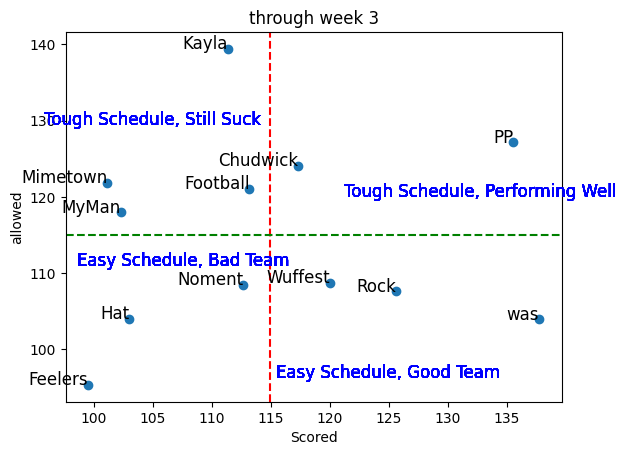

In [10]:
plt.scatter(grouped['score'], grouped['allowed'])
plt.axvline(x=grouped['score'].mean(), color='r', linestyle='--')
plt.axhline(y=grouped['allowed'].mean(), color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('allowed')


# Add labels to each point
for i, team in enumerate(grouped.index):
    plt.text(grouped['score'][i], grouped['allowed'][i], team.split(' ')[1], fontsize=12, ha='right')
    # Label each quadrantx
    plt.text(grouped['score'].mean() - 10, grouped['allowed'].max() - 10, 'Tough Schedule, Still Suck', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].mean() + 10, grouped['allowed'].min() + 1, 'Easy Schedule, Good Team', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].min() + 8, grouped['allowed'].mean() - 4, 'Easy Schedule, Bad Team', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].max() - 5, grouped['allowed'].mean() + 5, 'Tough Schedule, Performing Well', color='blue', fontsize=12, ha='center')

plt.title(f"through week {max(weeks)}")

/var/folders/87/rbsvb18s08x2_20r3q58gdjw0000gn/T/ipykernel_14925/2142069721.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(grouped['score'][i], grouped['projected'][i], team.split(' ')[1], fontsize=12, ha='right')


Text(0.5, 1.0, 'through week 3')

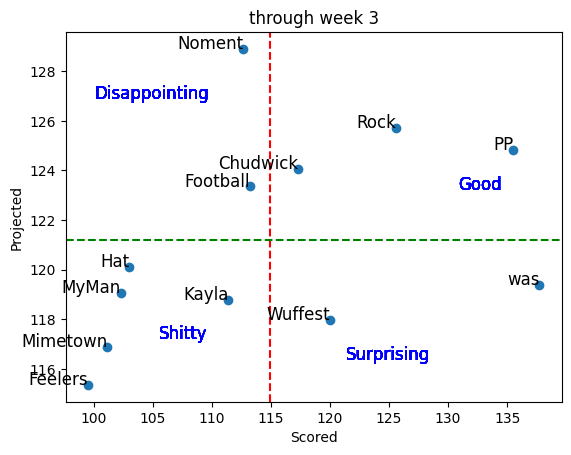

In [17]:
plt.scatter(grouped['score'], grouped['projected'])
plt.axvline(x=grouped['score'].mean(), color='r', linestyle='--')
plt.axhline(y=grouped['projected'].mean(), color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('Projected')


# Add labels to each point
for i, team in enumerate(grouped.index):
    plt.text(grouped['score'][i], grouped['projected'][i], team.split(' ')[1], fontsize=12, ha='right')
    # Label each quadrantx
    plt.text(grouped['score'].mean() - 10, grouped['projected'].max() - 2, 'Disappointing', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].mean() + 10, grouped['projected'].min() + 1, 'Surprising', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].min() + 8, grouped['projected'].mean() - 4, 'Shitty', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].max() - 5, grouped['projected'].mean() + 2, 'Good', color='blue', fontsize=12, ha='center')

plt.title(f"through week {max(weeks)}")

In [140]:
for team in teams:
    display(current_year_stats[(current_year_stats['team'] == team) & (current_year_stats['week'] == max(weeks))].sort_values('started_nonstarted'))

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5931,5,3,home,Dee Wuffest,Isiah Pacheco,5.80,11.05,RB,BE,2025,Jake,-5.25
5933,7,3,home,Dee Wuffest,Chris Olave,15.70,12.62,WR,BE,2025,Jake,3.08
5935,9,3,home,Dee Wuffest,Cam Skattebo,24.10,10.13,RB,BE,2025,Jake,13.97
5936,10,3,home,Dee Wuffest,Xavier Legette,0.00,0.00,WR,BE,2025,Jake,0.00
5937,11,3,home,Dee Wuffest,Cedric Tillman,5.60,9.66,WR,BE,2025,Jake,-4.06
5938,12,3,home,Dee Wuffest,Rashod Bateman,17.30,9.56,WR,BE,2025,Jake,7.74
5939,13,3,home,Dee Wuffest,C.J. Stroud,10.36,15.76,QB,BE,2025,Jake,-5.40
5941,15,3,home,Dee Wuffest,Packers D/ST,9.00,8.08,D/ST,D/ST,2025,Jake,0.92
5930,4,3,home,Dee Wuffest,DeVonta Smith,20.00,12.45,WR,FLEX,2025,Jake,7.55
5940,14,3,home,Dee Wuffest,Evan McPherson,5.00,7.62,K,K,2025,Jake,-2.62


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5945,3,3,away,LeFantasy Football,Marvin Harrison Jr.,7.40,12.73,WR,BE,2025,Ethan,-5.33
5947,5,3,away,LeFantasy Football,RJ Harvey,4.60,6.68,RB,BE,2025,Ethan,-2.08
5952,10,3,away,LeFantasy Football,Darnell Mooney,8.40,10.56,WR,BE,2025,Ethan,-2.16
5954,12,3,away,LeFantasy Football,Jaydon Blue,0.00,0.00,RB,BE,2025,Ethan,0.00
5955,13,3,away,LeFantasy Football,Hunter Henry,29.00,9.08,TE,BE,2025,Ethan,19.92
5956,14,3,away,LeFantasy Football,Ray-Ray McCloud III,4.00,5.49,WR,BE,2025,Ethan,-1.49
5957,15,3,away,LeFantasy Football,Matthew Stafford,13.84,15.97,QB,BE,2025,Ethan,-2.13
5953,11,3,away,LeFantasy Football,Steelers D/ST,15.00,5.81,D/ST,D/ST,2025,Ethan,9.19
5946,4,3,away,LeFantasy Football,DJ Moore,12.80,12.94,WR,FLEX,2025,Ethan,-0.14
5950,8,3,away,LeFantasy Football,Brandon Aubrey,8.00,8.73,K,K,2025,Ethan,-0.73


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5977,3,3,away,Mat Noment Oens,Xavier Worthy,0.00,0.00,WR,BE,2025,Harry,0.00
5981,7,3,away,Mat Noment Oens,Keon Coleman,5.00,12.58,WR,BE,2025,Harry,-7.58
5983,9,3,away,Mat Noment Oens,Rashid Shaheed,8.20,10.12,WR,BE,2025,Harry,-1.92
5984,10,3,away,Mat Noment Oens,Zach Charbonnet,0.00,0.00,RB,BE,2025,Harry,0.00
5985,11,3,away,Mat Noment Oens,Tyler Allgeier,1.40,6.65,RB,BE,2025,Harry,-5.25
5986,12,3,away,Mat Noment Oens,Ollie Gordon II,9.80,2.17,RB,BE,2025,Harry,7.63
5989,15,3,away,Mat Noment Oens,Dalton Schultz,8.90,8.19,TE,BE,2025,Harry,0.71
5987,13,3,away,Mat Noment Oens,Bills D/ST,4.00,5.63,D/ST,D/ST,2025,Harry,-1.63
5979,5,3,away,Mat Noment Oens,Jaylen Warren,13.10,16.13,RB,FLEX,2025,Harry,-3.03
5988,14,3,away,Mat Noment Oens,Tyler Loop,7.00,8.74,K,K,2025,Harry,-1.74


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
6030,8,3,home,Otay MyMan,Jordan Addison,0.00,0.00,WR,BE,2025,Cawley,0.00
6033,11,3,home,Otay MyMan,Cam Ward,11.96,14.13,QB,BE,2025,Cawley,-2.17
6026,4,3,home,Otay MyMan,Jayden Daniels,0.00,0.00,QB,BE,2025,Cawley,0.00
6028,6,3,home,Otay MyMan,Travis Hunter,3.10,11.52,WR,BE,2025,Cawley,-8.42
6029,7,3,home,Otay MyMan,Colston Loveland,4.10,4.38,TE,BE,2025,Cawley,-0.28
6037,15,3,home,Otay MyMan,Wan'Dale Robinson,3.60,11.65,WR,BE,2025,Cawley,-8.05
6032,10,3,home,Otay MyMan,Christian Kirk,5.50,9.22,WR,BE,2025,Cawley,-3.72
6031,9,3,home,Otay MyMan,Broncos D/ST,8.00,4.30,D/ST,D/ST,2025,Cawley,3.70
6024,2,3,home,Otay MyMan,Tee Higgins,2.50,12.05,WR,FLEX,2025,Cawley,-9.55
6027,5,3,home,Otay MyMan,Aaron Jones Sr.,0.00,0.00,RB,IR,2025,Cawley,0.00


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
6011,5,3,away,PBR Kayla,Matthew Golden,10.10,8.81,WR,BE,2025,Stager,1.29
6012,6,3,away,PBR Kayla,J.K. Dobbins,15.30,11.75,RB,BE,2025,Stager,3.55
6015,9,3,away,PBR Kayla,Nick Chubb,7.00,11.92,RB,BE,2025,Stager,-4.92
6016,10,3,away,PBR Kayla,Najee Harris,2.80,6.40,RB,BE,2025,Stager,-3.60
6017,11,3,away,PBR Kayla,Hollywood Brown,8.20,12.01,WR,BE,2025,Stager,-3.81
6020,14,3,away,PBR Kayla,Luther Burden III,19.80,2.69,WR,BE,2025,Stager,17.11
6021,15,3,away,PBR Kayla,Trevor Lawrence,7.78,16.25,QB,BE,2025,Stager,-8.47
6018,12,3,away,PBR Kayla,Vikings D/ST,32.00,6.99,D/ST,D/ST,2025,Stager,25.01
6008,2,3,away,PBR Kayla,Garrett Wilson,24.40,15.66,WR,FLEX,2025,Stager,8.74
6019,13,3,away,PBR Kayla,Cameron Dicker,12.00,8.38,K,K,2025,Stager,3.62


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5996,6,3,home,Small PP team,David Njoku,9.00,9.40,TE,BE,2025,Greenberg,-0.40
5997,7,3,home,Small PP team,Michael Pittman Jr.,19.30,10.50,WR,BE,2025,Greenberg,8.80
5999,9,3,home,Small PP team,Jerome Ford,5.00,6.62,RB,BE,2025,Greenberg,-1.62
6000,10,3,home,Small PP team,Marvin Mims Jr.,1.40,6.66,WR,BE,2025,Greenberg,-5.26
6001,11,3,home,Small PP team,Adam Thielen,0.00,5.60,WR,BE,2025,Greenberg,-5.60
6004,14,3,home,Small PP team,Dylan Sampson,0.20,4.65,RB,BE,2025,Greenberg,-4.45
6005,15,3,home,Small PP team,JuJu Smith-Schuster,9.50,7.55,WR,BE,2025,Greenberg,1.95
6003,13,3,home,Small PP team,Colts D/ST,16.00,6.91,D/ST,D/ST,2025,Greenberg,9.09
5995,5,3,home,Small PP team,George Pickens,17.80,12.97,WR,FLEX,2025,Greenberg,4.83
6002,12,3,home,Small PP team,Jake Elliott,3.00,8.55,K,K,2025,Greenberg,-5.55


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5900,8,3,home,Straw Hat,Dallas Goedert,10.30,8.94,TE,BE,2025,Cash,1.36
5906,14,3,home,Straw Hat,Elic Ayomanor,13.80,9.82,WR,BE,2025,Cash,3.98
5903,11,3,home,Straw Hat,Brandon Aiyuk,0.00,0.00,WR,BE,2025,Cash,0.00
5902,10,3,home,Straw Hat,Trey Benson,8.10,8.89,RB,BE,2025,Cash,-0.79
5907,15,3,home,Straw Hat,Dontayvion Wicks,4.10,8.45,WR,BE,2025,Cash,-4.35
5897,5,3,home,Straw Hat,Calvin Ridley,3.70,12.98,WR,BE,2025,Cash,-9.28
5899,7,3,home,Straw Hat,Bo Nix,13.42,16.04,QB,BE,2025,Cash,-2.62
5908,16,3,home,Straw Hat,Chargers D/ST,4.00,6.12,D/ST,D/ST,2025,Cash,-2.12
5898,6,3,home,Straw Hat,Cooper Kupp,5.10,10.51,WR,FLEX,2025,Cash,-5.41
5905,13,3,home,Straw Hat,Tyjae Spears,0.00,0.00,RB,IR,2025,Cash,0.00


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5959,1,3,home,Swordless Mimetown,Ladd McConkey,8.10,14.57,WR,BE,2025,Hayden,-6.47
5963,5,3,home,Swordless Mimetown,Emeka Egbuka,14.50,11.46,WR,BE,2025,Hayden,3.04
5964,6,3,home,Swordless Mimetown,Evan Engram,0.00,0.00,TE,BE,2025,Hayden,0.00
5965,7,3,home,Swordless Mimetown,Jacory Croskey-Merritt,10.10,11.19,RB,BE,2025,Hayden,-1.09
5967,9,3,home,Swordless Mimetown,Jauan Jennings,0.00,0.00,WR,BE,2025,Hayden,0.00
5970,12,3,home,Swordless Mimetown,Harold Fannin Jr.,5.50,8.16,TE,BE,2025,Hayden,-2.66
5973,15,3,home,Swordless Mimetown,DeAndre Hopkins,2.30,4.40,WR,BE,2025,Hayden,-2.10
5972,14,3,home,Swordless Mimetown,Falcons D/ST,5.00,6.94,D/ST,D/ST,2025,Hayden,-1.94
5968,10,3,home,Swordless Mimetown,Jordan Mason,23.60,14.66,RB,FLEX,2025,Hayden,8.94
5969,11,3,home,Swordless Mimetown,Harrison Butker,12.00,8.24,K,K,2025,Hayden,3.76


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
6044,5,3,away,Team Rock,Stefon Diggs,5.30,10.45,WR,BE,2025,Calvin,-5.15
6045,6,3,away,Team Rock,Kyler Murray,14.06,17.85,QB,BE,2025,Calvin,-3.79
6047,8,3,away,Team Rock,Jayden Higgins,1.50,3.78,WR,BE,2025,Calvin,-2.28
6048,9,3,away,Team Rock,Brenton Strange,12.10,7.67,TE,BE,2025,Calvin,4.43
6051,12,3,away,Team Rock,Quentin Johnston,14.90,12.66,WR,BE,2025,Calvin,2.24
6052,13,3,away,Team Rock,Bhayshul Tuten,8.10,5.65,RB,BE,2025,Calvin,2.45
6054,15,3,away,Team Rock,Hunter Renfrow,2.60,8.54,WR,BE,2025,Calvin,-5.94
6053,14,3,away,Team Rock,Buccaneers D/ST,16.00,6.98,D/ST,D/ST,2025,Calvin,9.02
6050,11,3,away,Team Rock,Javonte Williams,12.20,16.14,RB,FLEX,2025,Calvin,-3.94
6049,10,3,away,Team Rock,Chase McLaughlin,20.00,8.57,K,K,2025,Calvin,11.43


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
6080,8,3,away,That was the dagger,Rhamondre Stevenson,4.60,11.86,RB,BE,2025,DC,-7.26
6086,14,3,away,That was the dagger,Zach Ertz,6.80,9.55,TE,BE,2025,DC,-2.75
6084,12,3,away,That was the dagger,Ray Davis,0.00,4.06,RB,BE,2025,DC,-4.06
6087,15,3,away,That was the dagger,Kareem Hunt,11.40,9.68,RB,BE,2025,DC,1.72
6079,7,3,away,That was the dagger,Brock Purdy,0.00,0.00,QB,BE,2025,DC,0.00
6088,16,3,away,That was the dagger,Romeo Doubs,4.50,10.39,WR,BE,2025,DC,-5.89
6077,5,3,away,That was the dagger,Rashee Rice,0.00,0.00,WR,BE,2025,DC,0.00
6083,11,3,away,That was the dagger,Seahawks D/ST,17.00,6.87,D/ST,D/ST,2025,DC,10.13
6078,6,3,away,That was the dagger,Ricky Pearsall,19.70,12.11,WR,FLEX,2025,DC,7.59
6075,3,3,away,That was the dagger,George Kittle,0.00,0.00,TE,IR,2025,DC,0.00


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
5917,8,3,away,Tiitsburgh Feelers,Quinshon Judkins,16.50,9.43,RB,BE,2025,Gavin,7.07
5923,14,3,away,Tiitsburgh Feelers,Kayshon Boutte,4.80,8.41,WR,BE,2025,Gavin,-3.61
5920,11,3,away,Tiitsburgh Feelers,Jared Goff,12.68,16.43,QB,BE,2025,Gavin,-3.75
5919,10,3,away,Tiitsburgh Feelers,Brian Robinson Jr.,2.20,6.96,RB,BE,2025,Gavin,-4.76
5918,9,3,away,Tiitsburgh Feelers,Rachaad White,2.40,7.21,RB,BE,2025,Gavin,-4.81
5925,16,3,away,Tiitsburgh Feelers,Isaiah Likely,0.00,0.00,TE,BE,2025,Gavin,0.00
5913,4,3,away,Tiitsburgh Feelers,Jaylen Waddle,14.90,12.68,WR,BE,2025,Gavin,2.22
5922,13,3,away,Tiitsburgh Feelers,49ers D/ST,6.00,5.83,D/ST,D/ST,2025,Gavin,0.17
5911,2,3,away,Tiitsburgh Feelers,James Conner,6.70,13.43,RB,FLEX,2025,Gavin,-6.73
5916,7,3,away,Tiitsburgh Feelers,Chris Godwin Jr.,0.00,0.00,WR,IR,2025,Gavin,0.00


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name,diff
6063,8,3,home,Zilwaukee Chudwick,Khalil Shakir,14.50,11.10,WR,BE,2025,Chad,3.40
6066,11,3,home,Zilwaukee Chudwick,Ravens D/ST,-6.00,3.32,D/ST,BE,2025,Chad,-9.32
6065,10,3,home,Zilwaukee Chudwick,Jayden Reed,0.00,0.00,WR,BE,2025,Chad,0.00
6064,9,3,home,Zilwaukee Chudwick,Josh Downs,5.40,8.68,WR,BE,2025,Chad,-3.28
6070,15,3,home,Zilwaukee Chudwick,Troy Franklin,2.80,10.84,WR,BE,2025,Chad,-8.04
6071,16,3,home,Zilwaukee Chudwick,Kenneth Gainwell,9.60,10.66,RB,BE,2025,Chad,-1.06
6060,5,3,home,Zilwaukee Chudwick,T.J. Hockenson,15.90,10.10,TE,BE,2025,Chad,5.80
6069,14,3,home,Zilwaukee Chudwick,Commanders D/ST,10.00,6.63,D/ST,D/ST,2025,Chad,3.37
6058,3,3,home,Zilwaukee Chudwick,Jerry Jeudy,2.70,12.04,WR,FLEX,2025,Chad,-9.34
6062,7,3,home,Zilwaukee Chudwick,Joe Mixon,0.00,0.00,RB,IR,2025,Chad,0.00


In [134]:
leaders = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'player_scored':['sum', 'mean', 'std']}).reset_index()
leaders.sort_values(['started_nonstarted', ('player_scored', 'sum')], ascending=False)

team started_nonstarted player_scored             \
                                                      sum       mean   
73             Team Rock                 WR        119.80  19.966667   
100   Zilwaukee Chudwick                 WR        104.60  17.433333   
7            Dee Wuffest                 WR         93.30  15.550000   
57             Straw Hat                 WR         84.80  14.133333   
65    Swordless Mimetown                 WR         81.00  13.500000   
..                   ...                ...           ...        ...   
49             Straw Hat                 BE        169.40   8.066667   
66             Team Rock                 BE        166.54   7.930476   
74   That was the dagger                 BE        122.42   5.829524   
92    Zilwaukee Chudwick                 BE        122.24   6.112000   
24            Otay MyMan                 BE         94.04   4.478095   

                
           std  
73    9.441539  
100   4.874697  
7    12.750333  
57   12.781028  
65   11.623769  
..         ...  
49    7.078317  
66    6.583739  
74    5.757630  
92    7.721364  
24    5.227006  

[101 rows x 5 columns]